Пример 1:

In [188]:
import numpy as np
import sympy as sp

arr = np.array([[1, 2], [3, 4]])
print(arr)

[[1 2]
 [3 4]]


In [189]:
arr = np.matrix([[1, 2], [3, 4]])
print(arr)

[[1 2]
 [3 4]]


In [190]:
arr = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(arr)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [191]:
a = sp.Matrix([[1,2],[3,4]])
a

Matrix([
[1, 2],
[3, 4]])

In [192]:
# Вычисление определителя
# 1) по определению
arr = np.matrix('1 2; 3 4')
detA = arr[0,0] * arr[1, 1] - arr[0, 1] * arr[1, 0]
print(detA)

# 2) средствами numpy
detA = np.linalg.det(arr)
print(detA)

# 3) средствами sympy
sp.det(a)

-2
-2.0000000000000004


-2

Упражнение 2.1. Вычислить определители второго порядка, обращаясь через индексы к элементам массива, и сделать проверку с помощью функции det. Буквенные выражения необходимо задать в символьном виде:<br>
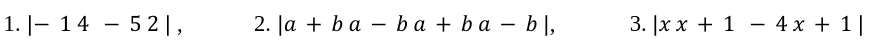

In [193]:
a,b,x = sp.symbols('a b x')

v = []
v.append(sp.Matrix([[-1, 4], [-5, 2]]))
v.append(sp.Matrix([[a + b, a - b], [a + b, a - b]]))
v.append(sp.Matrix([[x, x + 1], [-4, x + 1]]))

for m in v:
  det = m[0,0] * m[1, 1] - m[0, 1] * m[1, 0]
  print('det by sympy:', sp.det(m))
  print('det by indexes:', det)

det by sympy: 18
det by indexes: 18
det by sympy: 0
det by indexes: 0
det by sympy: x**2 + 5*x + 4
det by indexes: x*(x + 1) + 4*x + 4


Упражнение 2.2. Вычислить определители третьего порядка с помощью функции det:<br>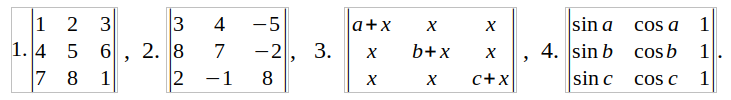

In [194]:
a,b,c,x = sp.symbols('a b c x')
v = []

v.append(sp.Matrix([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 1]]))

v.append(sp.Matrix([[3, 4, -5],
                    [8, 7, -2],
                    [2, -1, 8]]))

v.append(sp.Matrix([[a + x,   x,      x],
                    [x,       b + x,  x],
                    [x,       x,      c + x]]))

v.append(sp.Matrix([[sp.sin(a), sp.cos(a), 1],
                    [sp.sin(b), sp.cos(b), 1],
                    [sp.sin(c), sp.cos(c), 1]]))

for m in v:
  print('det by sympy:', sp.det(m))


det by sympy: 24
det by sympy: 0
det by sympy: a*b*c + a*b*x + a*c*x + b*c*x
det by sympy: sin(a)*cos(b) - sin(a)*cos(c) - sin(b)*cos(a) + sin(b)*cos(c) + sin(c)*cos(a) - sin(c)*cos(b)


In [195]:
#пример 2
A = np.matrix('3 -1 2; 1 4 -1; 2 3 1')
print(A)

B = np.matrix('-4; 10; 8')
print(B)

A_det = np.linalg.det(A)
print(A_det)

X_m = np.matrix(A)
X_m[:, 0] = B
print('X_m:')
print(X_m)

Y_m = np.matrix(A)
Y_m[:, 1] = B
print('Y_m:')
print(Y_m)

Z_m = np.matrix(A)
Z_m[:, 2] = B
print('Z_m:')
print(Z_m)

x = np.linalg.det(X_m) / A_det
y = np.linalg.det(Y_m) / A_det
z = np.linalg.det(Z_m) / A_det

print(x)
print(y)
print(z)

del(A, B, A_det, X_m, Y_m, Z_m, x, y, z)

[[ 3 -1  2]
 [ 1  4 -1]
 [ 2  3  1]]
[[-4]
 [10]
 [ 8]]
13.999999999999996
X_m:
[[-4 -1  2]
 [10  4 -1]
 [ 8  3  1]]
Y_m:
[[ 3 -4  2]
 [ 1 10 -1]
 [ 2  8  1]]
Z_m:
[[ 3 -1 -4]
 [ 1  4 10]
 [ 2  3  8]]
-1.0000000000000009
3.0000000000000013
0.9999999999999997


Упражнение 2.3. Решить системы уравнений по формулам Крамера. Сделать проверку, используя равенство: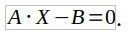 <br>
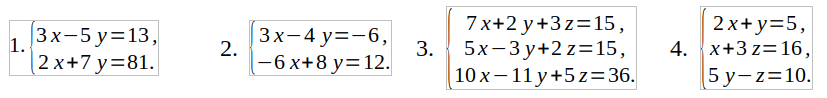

In [196]:
def find_roots_num(A, B):

  if np.shape(A)[0] != np.shape(B)[0]:
    return []

  col = np.shape(A)[1]
  A_det = np.linalg.det(A)
  new_dets = []
  new_det_sum = 0

  for m in range(0, col):
    new_mat = np.matrix(A)
    new_mat[:, m] = B
    new_dets.append(np.linalg.det(new_mat))
    new_det_sum = new_det_sum + new_dets[m]
  
  if A_det == 0:
    if new_det_sum == 0:
      return np.matrix(col * [[np.nan]])
    else:
      return np.matrix(col * [[np.inf]])

  roots = []
  for m in range(0, col):
    roots.append([(new_dets[m] / A_det).round(5)])

  return np.matrix(roots)

# Если ранг матрицы равен рангу расширенной матрицы,
# но меньше числа неизвестных, то система имеет бесконечное число решений.

# Если ранг матрицы меньше ранга расширенной матрицы
# и равен числу неизвестных, то система не имеет решения.

# 1)
A1 = np.matrix([[3 , -5],
                [2, 7]])
B1 = np.matrix([[13], [81]])

roots = find_roots_num(A1, B1)
print('1)')
print('Solved roots:\n', roots)
print('Solved roots with numpy:\n', np.linalg.solve(A1, B1))
print('check:\n', A1 * roots - B1 == 0)

1)
Solved roots:
 [[16.]
 [ 7.]]
Solved roots with numpy:
 [[16.]
 [ 7.]]
check:
 [[ True]
 [ True]]


In [197]:
# 2)
A2 = np.matrix([[3, -4], 
                [-6, 8]])
B2 = np.matrix([[-6], [12]])

roots = find_roots_num(A2, B2)
print('\n\n2)')
print('Solved roots:\n', roots)
print('Solved roots with numpy: ERROR (infinite solutions)\n')
# print('Solved roots with numpy:\n', np.linalg.solve(A2, B2)) !!!
print('check:\n', A2 * roots == B2)




2)
Solved roots:
 [[nan]
 [nan]]
Solved roots with numpy: ERROR (infinite solutions)

check:
 [[False]
 [False]]


In [198]:
# 3)
A3 = np.matrix([[7,    2,   3],
                [5,   -3,   2],
                [10, -11,   5]])
B3 = np.matrix([[15], [15], [36]])

roots = find_roots_num(A3, B3)
print('\n\n3)')
print('Solved roots:\n', roots)
print('Solved roots with numpy:\n', np.linalg.solve(A3, B3))
print('check:\n', A3 * roots == B3)




3)
Solved roots:
 [[ 2.]
 [-1.]
 [ 1.]]
Solved roots with numpy:
 [[ 2.]
 [-1.]
 [ 1.]]
check:
 [[ True]
 [ True]
 [ True]]


In [199]:
# 4)
A4 = np.matrix([[2,    1,   0],
                [1,    0,   3],
                [0,    5,   -1]])
B4 = np.matrix([[5], [16], [10]])

roots = find_roots_num(A4, B4)

print('\n\n4)')
print('Solved roots:\n', roots)
print('Solved roots with numpy:\n', np.linalg.solve(A4, B4))
print('check:\n', A4 * roots == B4)



4)
Solved roots:
 [[1.]
 [3.]
 [5.]]
Solved roots with numpy:
 [[1.]
 [3.]
 [5.]]
check:
 [[ True]
 [ True]
 [ True]]


Упражнение 2.4. Решить системы уравнений упражнения 2.3(1) и 2.3(3) в библиотеке Sympy. Сделать проверку (метод *).

In [200]:
from sympy.solvers.solveset import linsolve

def find_roots_sym(A, B):
  
  if sp.shape(A)[0] != sp.shape(B)[0]:
    return []

  A_det = sp.det(A)

  roots = []
  for m in range(0, sp.shape(A)[1]):
    new_mat = sp.Matrix(A)
    new_mat[:, m] = sp.Matrix(B)

    roots.append([(sp.det(new_mat) / A_det)])

  return sp.Matrix(roots)


A1 = sp.Matrix([[3, -5],
                [2, 7]])
B1 = sp.Matrix([[13], [81]])

roots = find_roots_sym(A1, B1)

print('1)')
print('Solved roots:\n', roots)
print('Solved roots with sympy:\n', A1.solve(B1))
print('check:\n', A1 * roots - B1 == sp.Matrix(2 * [[0]]))

# 3)
A3 = sp.Matrix([[7,    2,   3],
                [5,   -3,   2],
                [10, -11,   5]])
B3 = sp.Matrix([[15], [15], [36]])

roots = find_roots_sym(A3, B3)

print('\n3)')
print('Solved roots:\n', roots)
print('Solved roots with sympy:\n', A3.solve(B3))
print('check:\n', A3 * roots - B3 == sp.Matrix(3 * [[0]]))

1)
Solved roots:
 Matrix([[16], [7]])
Solved roots with sympy:
 Matrix([[16], [7]])
check:
 True

3)
Solved roots:
 Matrix([[2], [-1], [1]])
Solved roots with sympy:
 Matrix([[2], [-1], [1]])
check:
 True


**Справка:** <br>
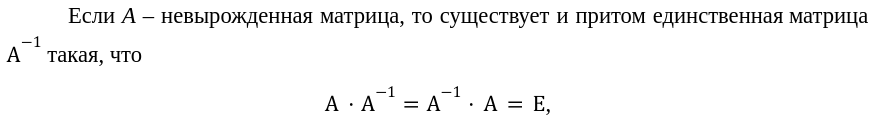<br>
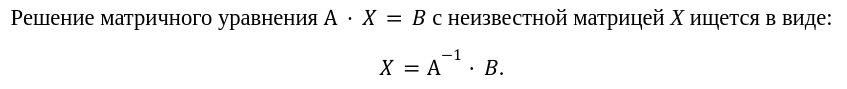

In [201]:
# Пример 3
A = np.matrix('3 -1 2; 1 4 -1; 2 3 1')
B = np.matrix('-4; 10; 8')

A_inv = np.linalg.inv(A)
print(A_inv)
X = A_inv.dot(B)
X

[[ 0.5         0.5        -0.5       ]
 [-0.21428571 -0.07142857  0.35714286]
 [-0.35714286 -0.78571429  0.92857143]]


matrix([[-1.],
        [ 3.],
        [ 1.]])

Упражнение 2.5. Решить системы уравнений из упражнений 2.3, используя обратную матрицу.  

In [202]:
# 1)
A1 = np.matrix([[3 , -5],
                [2, 7]])
B1 = np.matrix([[13], [81]])

A_inv = np.linalg.inv(A1)

roots = A_inv * B1
print('1)')
print('Solved roots:\n', roots)

1)
Solved roots:
 [[16.]
 [ 7.]]


In [203]:
# 2)
A2 = np.matrix([[3, -4], 
                [-6, 8]])
B2 = np.matrix([[-6], [12]])

A_inv = np.linalg.inv(A2)

roots = A_inv * B2

print('\n\n2)')
print('Solved roots:\n', roots)

LinAlgError: Singular matrix

In [ ]:
# 3)
A3 = np.matrix([[7,    2,   3],
                [5,   -3,   2],
                [10, -11,   5]])
B3 = np.matrix([[15], [15], [36]])

A_inv = np.linalg.inv(A3)

roots = A_inv * B3

print('\n\n3)')
print('Solved roots:\n', roots)



3)
Solved roots:
 [[ 2.]
 [-1.]
 [ 1.]]


In [ ]:
# 4)
A4 = np.matrix([[2,    1,   0],
                [1,    0,   3],
                [0,    5,   -1]])
B4 = np.matrix([[5], [16], [10]])

A_inv = np.linalg.inv(A4)

roots = A_inv * B4

print('\n\n4)')
print('Solved roots:\n', roots)



4)
Solved roots:
 [[1.]
 [3.]
 [5.]]
